In [95]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [96]:
start_date = "2025-08-10"
end_date = "2025-08-14"

In [97]:
def get_google_analytics_data(start_date,end_date):
    url="https://n8n.syedd.com/webhook/6e03de77-7003-4900-9a9c-03cfd1f85608"
    body={
        "start_date":start_date,
        "end_date":end_date
    }
    try:
        res = requests.post(url,json=body,headers={"Content-Type":"application/json"})
        res.raise_for_status()  
        # Check if response is empty
        if not res.text.strip():
            print(f"Warning: Empty response from Google Analytics API for dates {start_date} to {end_date}")
            return []
        
        return res.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making request to Google Analytics API: {e}")
        return []
    except ValueError as e:
        print(f"Error parsing JSON from Google Analytics API response: {e}")
        print(f"Response text: {res.text}")
        return []

In [98]:
ga_data = get_google_analytics_data(start_date,end_date)
ga_df = pd.DataFrame(ga_data) if ga_data else pd.DataFrame()

In [99]:
print(ga_df.describe())
print(ga_df.info())

            date pagePath sessionSourceMedium deviceCategory       city  \
count        464      464                 464            464        464   
unique         5       14                  33              3        195   
top     20250809        /  instagram / social         mobile  (not set)   
freq         118      226                 104            267         41   

               country browser sessionManualAdContent continent  \
count              464     464                    464       464   
unique              50       8                     60         6   
top     United Kingdom  Chrome              (not set)    Europe   
freq                84     259                    132       157   

       screenPageViews activeUsers sessions averageSessionDuration bounceRate  \
count              464         464      464                    464        464   
unique               7           4        4                    434          5   
top                  1           1        1  

In [100]:
ga_df["screenPageViews"] = ga_df["screenPageViews"].astype(int)
ga_df["averageSessionDuration"] = ga_df["averageSessionDuration"].astype(float)
ga_df["userEngagementDuration"] = ga_df["userEngagementDuration"].astype(float)
ga_df["bounceRate"] = ga_df["bounceRate"].astype(float)
ga_df["sessions"] = ga_df["sessions"].astype(float)
ga_df["totalUsers"] = ga_df["totalUsers"].astype(int)
ga_df["scrolledUsers"] = ga_df["scrolledUsers"].astype(int)
ga_df["activeUsers"] = ga_df["activeUsers"].astype(int)

In [101]:
#convert date to date_time
ga_df["date"] = pd.to_datetime(ga_df["date"])
ga_df = ga_df.sort_values(by="date")
print(ga_df["date"])
ga_df["day_of_week"] = ga_df["date"].dt.day_name()
print(ga_df["day_of_week"])


131   2025-08-09
111   2025-08-09
112   2025-08-09
113   2025-08-09
114   2025-08-09
         ...    
402   2025-08-13
401   2025-08-13
400   2025-08-13
409   2025-08-13
463   2025-08-13
Name: date, Length: 464, dtype: datetime64[ns]
131     Saturday
111     Saturday
112     Saturday
113     Saturday
114     Saturday
         ...    
402    Wednesday
401    Wednesday
400    Wednesday
409    Wednesday
463    Wednesday
Name: day_of_week, Length: 464, dtype: object


In [102]:
#explorining different sources
split = ga_df["sessionSourceMedium"].str.split("/")
ga_df[['source', 'medium']] = ga_df['sessionSourceMedium'].str.split(' / ', expand=True)

ga_df["ad_content"] = ga_df["sessionManualAdContent"]

ga_df = ga_df.drop(columns=["sessionManualAdContent","sessionSourceMedium"])


In [103]:
print(ga_df.describe())
print(ga_df.info())

                                date  screenPageViews  activeUsers  \
count                            464       464.000000   464.000000   
mean   2025-08-10 19:36:12.413793024         1.237069     0.954741   
min              2025-08-09 00:00:00         0.000000     0.000000   
25%              2025-08-09 00:00:00         1.000000     1.000000   
50%              2025-08-11 00:00:00         1.000000     1.000000   
75%              2025-08-12 00:00:00         1.000000     1.000000   
max              2025-08-13 00:00:00         7.000000     3.000000   
std                              NaN         0.807527     0.322147   

         sessions  averageSessionDuration  bounceRate  userEngagementDuration  \
count  464.000000              464.000000  464.000000              464.000000   
mean     1.116379               89.067971    0.224856               32.778017   
min      1.000000                0.000000    0.000000                0.000000   
25%      1.000000                2.326647    

date
2025-08-09    156
2025-08-10    112
2025-08-11    114
2025-08-12     95
2025-08-13     97
Name: screenPageViews, dtype: int64


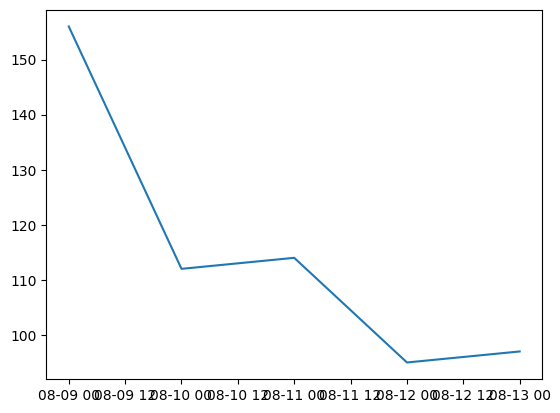

In [ ]:
grouped_by_day = ga_df.groupby("")["screenPageViews"].sum()
print(grouped_by_day)
plt.plot(grouped_by_day)
plt.show()